In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os, os.path as path
from tqdm import tqdm

DATA_FOLDER = 'data'
OUTPUT_FOLDER = 'out'

if not path.exists(OUTPUT_FOLDER):
    os.mkdir(OUTPUT_FOLDER)

In [19]:
class Spectrum:
    def __init__(self, target):
        self.target = target

        wavelength, flux = self._read_spectrum()
        self.wavelength = wavelength
        self.flux = flux

    def _read_spectrum(self) -> tuple[np.ndarray[np.float64], np.ndarray[np.float64]]:
        wavelength = []
        flux = []

        for dir_entry in tqdm(os.listdir(path.join(DATA_FOLDER, self.target)), f'Reading data for target {self.target}'):
            entry_path = path.join(DATA_FOLDER, self.target, dir_entry)

            # Ignore directories and hidden files
            if not path.isfile(entry_path) or dir_entry.startswith('.'):
                continue

            # Check for the right file format
            if not dir_entry.endswith('.ascii'):
                print(f'[WARNING]: not a valid data file {dir_entry}')
                continue

            spectrum = np.loadtxt(entry_path, unpack=True)
            wavelength.append(spectrum[0])
            flux.append(spectrum[1])

        # Sort based on the wavelength
        wavelength = np.concatenate(wavelength)
        flux = np.concatenate(flux)
        sorted_indices = np.argsort(wavelength)

        return wavelength[sorted_indices], flux[sorted_indices]
    
    def plot(self, savefile=None):
        plt.plot(self.wavelength, self.flux)
        plt.title(self.target)
        plt.xlabel('Wavelength [Å]')
        plt.ylabel('Flux [erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$]')

        if savefile != None:
            plt.savefig(path.join(OUTPUT_FOLDER, savefile))

        plt.show()

        
        

Reading data for target HD185859: 100%|██████████| 166/166 [00:00<00:00, 4676.58it/s]


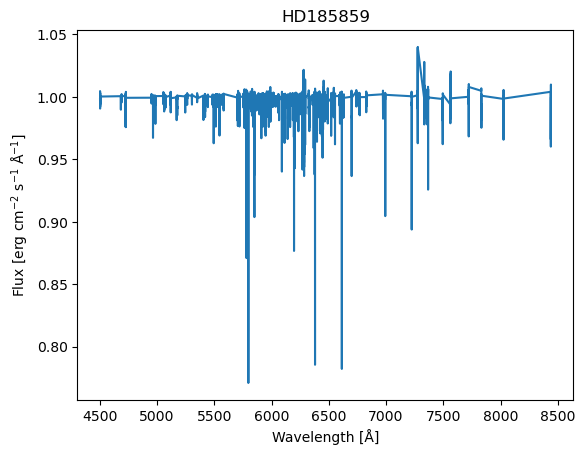

In [20]:
hd185859 = Spectrum('HD185859')
hd185859.plot()